<a href="https://colab.research.google.com/github/Carlosravick/API-BANCO-DE-DADOS/blob/main/EngenhariadedadosAnalise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brazilian-ecommerce


In [ ]:
import os

# Lista os arquivos dentro da pasta baixada
files = os.listdir('/kaggle/input/brazilian-ecommerce')
print(files)

['olist_customers_dataset.csv', 'olist_sellers_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_order_items_dataset.csv', 'olist_products_dataset.csv', 'olist_geolocation_dataset.csv', 'product_category_name_translation.csv', 'olist_orders_dataset.csv', 'olist_order_payments_dataset.csv']


In [ ]:
print(path)

/kaggle/input/brazilian-ecommerce


In [ ]:
import pandas as pd
import os

path = '/kaggle/input/brazilian-ecommerce'  # Garanta que este seja o caminho correto

sellers = pd.read_csv(os.path.join(path, 'olist_sellers_dataset.csv'), sep=',')
order_reviews = pd.read_csv(os.path.join(path, 'olist_order_reviews_dataset.csv'), sep=',')
order_items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'), sep=',')
products = pd.read_csv(os.path.join(path, 'olist_products_dataset.csv'), sep=',')
geolocation = pd.read_csv(os.path.join(path, 'olist_geolocation_dataset.csv'), sep=',')
product_category_translation = pd.read_csv(os.path.join(path, 'product_category_name_translation.csv'), sep=',')
orders = pd.read_csv(os.path.join(path, 'olist_orders_dataset.csv'), sep=',')
order_payments = pd.read_csv(os.path.join(path, 'olist_order_payments_dataset.csv'), sep=',')
customers = pd.read_csv(os.path.join(path, 'olist_customers_dataset.csv'), sep=',')

In [ ]:
# Agora tente visualizar os DataFrames
print("Sellers DataFrame:")
print(sellers.head())

Sellers DataFrame:
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  


In [ ]:

# 3. Normalização de colunas
def normalize_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
    return df

for df in [sellers, order_reviews, order_items, products, geolocation,
           product_category_translation, orders, order_payments, customers]:
    normalize_columns(df)

In [ ]:
# 4. Remoção de duplicatas
datasets = [sellers, order_reviews, order_items, products, geolocation,
            product_category_translation, orders, order_payments, customers]
for df in datasets:
    df.drop_duplicates(inplace=True)

In [ ]:
# 5. Normalização de strings relevantes
products['product_category_name'] = products['product_category_name'].str.lower().str.strip()
product_category_translation['product_category_name'] = product_category_translation['product_category_name'].str.lower().str.strip()

In [ ]:
# 6. Construção do modelo relacional
orders_items_merged = orders.merge(order_items, on='order_id', how='left')
orders_items_payments = orders_items_merged.merge(order_payments, on='order_id', how='left')
orders_full = orders_items_payments.merge(customers, on='customer_id', how='left')
orders_full = orders_full.merge(products, on='product_id', how='left')
orders_full = orders_full.merge(sellers, on='seller_id', how='left')
orders_full = orders_full.merge(product_category_translation, on='product_category_name', how='left')

In [ ]:
# 7. Resumo do processo
print("Dados preparados e modelo relacional consolidado.")

Dados preparados e modelo relacional consolidado.


In [ ]:
orders_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

In [ ]:
orders_full[orders_full['order_item_id'].isnull()][['order_id', 'order_status']].value_counts()


,,count
order_id,order_status,
48f2d0b950703bfb145b7c3c0641b4bb,unavailable,10
0b398dbb3e7c81005f3c69b01488c4c9,unavailable,9
896fbd78a9ef3839b34b893f48f6bc67,canceled,8
1857e77a4bad8abb2db929f107430663,canceled,6
b34369ee8397436dd7ceb8bb7783671d,canceled,4
...,...,...
52b7f26dd95604cb836ba17f96a6b056,unavailable,1
52dfaf3e430903d40571c0eb44d324b5,unavailable,1
52f308ce830731bfdfea4539e140073f,unavailable,1


In [ ]:
orders_full['motivo_nao_entrega'] = orders_full['order_status'].apply(
    lambda x: 'cancelado' if x == 'canceled' else 'indisponível' if x == 'unavailable' else 'entregue'
)
orders_full[['order_status', 'motivo_nao_entrega']].head()

,order_status,motivo_nao_entrega
0,delivered,entregue
1,delivered,entregue
2,delivered,entregue
3,delivered,entregue
4,delivered,entregue


In [ ]:
orders_full['motivo_nao_entrega'].value_counts().head()


,count
motivo_nao_entrega,
entregue,117039
cancelado,745
indisponível,650


In [ ]:
orders_full[orders_full['motivo_nao_entrega'] != 'entregue'][['order_id', 'order_status', 'motivo_nao_entrega']].head()


,order_id,order_status,motivo_nao_entrega
319,8e24261a7e58791d10cb1bf9da94df5c,unavailable,indisponível
470,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,cancelado
700,c272bcd21c287498b4883c7512019702,unavailable,indisponível
735,714fb133a6730ab81fa1d3c1b2007291,canceled,cancelado
821,37553832a3a89c9b2db59701c357ca67,unavailable,indisponível


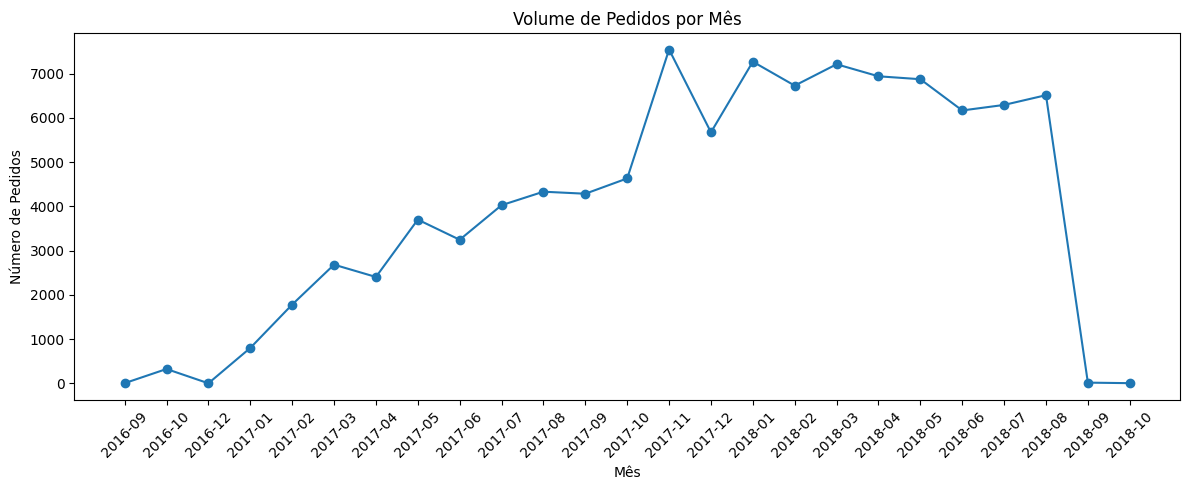

In [ ]:
orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full['order_purchase_timestamp'])
orders_full['order_month'] = orders_full['order_purchase_timestamp'].dt.to_period('M')

pedidos_por_mes = orders_full.groupby('order_month')['order_id'].nunique().reset_index()
pedidos_por_mes.columns = ['mes', 'volume_pedidos']

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(pedidos_por_mes['mes'].astype(str), pedidos_por_mes['volume_pedidos'], marker='o')
plt.xticks(rotation=45)
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.tight_layout()
plt.show()


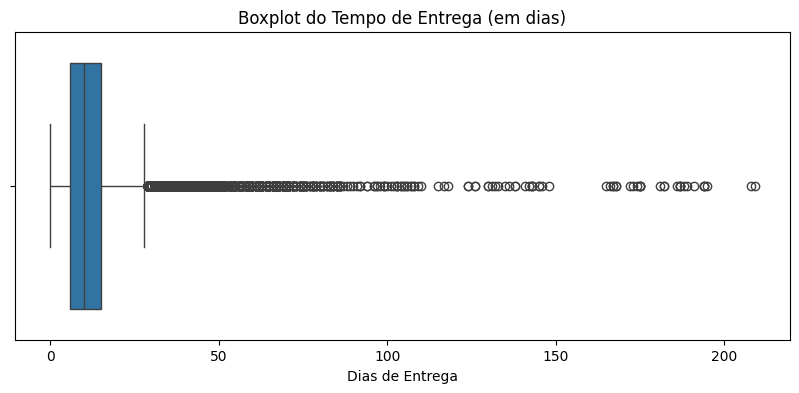

In [ ]:
# Garantir que as datas estão no tipo datetime
orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full['order_purchase_timestamp'])
orders_full['order_delivered_customer_date'] = pd.to_datetime(orders_full['order_delivered_customer_date'])

# Criar a coluna de tempo de entrega em dias
orders_full['delivery_time_days'] = (
    orders_full['order_delivered_customer_date'] - orders_full['order_purchase_timestamp']
).dt.days

# Visualizar a distribuição com boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.boxplot(x=orders_full['delivery_time_days'])
plt.title("Boxplot do Tempo de Entrega (em dias)")
plt.xlabel("Dias de Entrega")
plt.show()


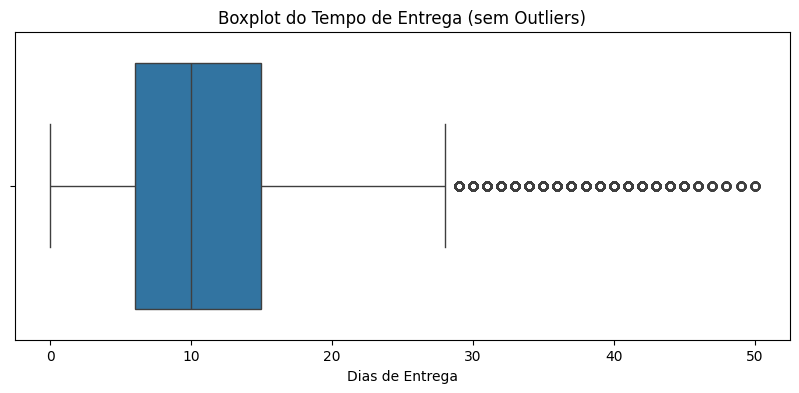

In [ ]:
# Filtrar outliers com base em um limite de 50 dias
filtered = orders_full[orders_full['delivery_time_days'] <= 50]

plt.figure(figsize=(10, 4))
sns.boxplot(x=filtered['delivery_time_days'])
plt.title("Boxplot do Tempo de Entrega (sem Outliers)")
plt.xlabel("Dias de Entrega")
plt.show()


In [ ]:
orders_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,motivo_nao_entrega,order_month,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,9350.0,maua,SP,housewares,entregue,2017-10,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,9350.0,maua,SP,housewares,entregue,2017-10,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,9350.0,maua,SP,housewares,entregue,2017-10,8.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,entregue,2018-07,13.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,14840.0,guariba,SP,auto,entregue,2018-08,9.0


In [ ]:
print(order_items.head())



                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7